In [1]:
import numpy as np
import sys
sys.path.insert(0, '..')
import matplotlib.pyplot as plt
import tqdm
import time
import pandas as pd
import random

from hierarchical.index import HierarchicalIndex
from baselines.baselines import *
from ranges.stripe_range import StripeRange

#### Test Index

In [ ]:
# points = np.random.rand(100, 2)  # Generate 100 random 2D points
points = np.random.zipf(1.5, size=(10, 2))
index = HierarchicalIndex(points)
index.build_index()

print("Layers:")
for i, layer in enumerate(index.layers):
    print(f"Layer {i}: {layer.shape[0]} points")
    print(layer)

L: 4
Layers:
Layer 0: 10 points
[0 1 2 3 4 5 6 7 8 9]
Layer 1: 5 points
[3 2 1 5 8]
Layer 2: 2 points
[5 3]
Layer 3: 1 points
[3]


: 

: 

: 

In [ ]:
index.find_coverage()
index.find_neighbor_stats()

: 

: 

: 

#### Test Querying

In [ ]:
v = points[5]
norm = np.linalg.norm(v)
v = v / norm
dot = np.dot(v, v)
query = StripeRange(v, dot - 0.1, dot + 0.1)

: 

: 

: 

In [ ]:
linear_search(points, query)

[2, 4]

: 

: 

: 

In [ ]:
index.query(query)

candidates:  2 all:  10


[np.int64(2), np.int64(4)]

: 

: 

: 

### Experiments:

#### Zipf 2D

In [ ]:
results = {
    "our_time": [],
    "linear_time": [],
    "our_recall": [],
    "n_points": [],
    "dimension": [],
}

for n in range(1000, 10000, 500):
    for i in range(10):
        print("N: ", n, "run: ", i + 1)
        points = np.random.zipf(1.5, size=(n, 2))

        print("Building index...")
        index = HierarchicalIndex(points)
        index.build_index()
        index.find_coverage()
        index.find_neighbor_stats()

        # Query range
        v = points[random.randint(0, n - 1)]
        norm = np.linalg.norm(v)
        v = v / norm
        dot = np.dot(v, v)
        query = StripeRange(v, dot - 0.2, dot + 0.2)

        print("Querying...")

        start = time.time()
        linear_results = linear_search(points, query)
        linear_time = time.time() - start
        print(
            "Linear search found",
            len(linear_results),
            "results in",
            linear_time,
            "seconds",
        )

        start = time.time()
        our_results = index.query(query)
        our_time = time.time() - start
        print("Our search found", len(our_results), "results in", our_time, "seconds")

        recall = (
            len(our_results) / len(linear_results) if len(linear_results) > 0 else 1.0
        )

        results["our_time"].append(our_time)
        results["linear_time"].append(linear_time)
        results["our_recall"].append(recall)
        results["n_points"].append(n)
        results["dimension"].append(2)

N:  1000 run:  1
Building index...
L: 10
Querying...
Linear search found 139 results in 0.0007009506225585938 seconds
candidates:  139 all:  1000
Our search found 139 results in 0.0003609657287597656 seconds
N:  1000 run:  2
Building index...
L: 10
Querying...
Linear search found 0 results in 0.0008788108825683594 seconds
candidates:  7 all:  1000
Our search found 0 results in 8.797645568847656e-05 seconds
N:  1000 run:  3
Building index...
L: 10
Querying...
Linear search found 353 results in 0.0007071495056152344 seconds
candidates:  427 all:  1000
Our search found 353 results in 0.0008075237274169922 seconds
N:  1000 run:  4
Building index...
L: 10
Querying...
Linear search found 145 results in 0.0007932186126708984 seconds
candidates:  160 all:  1000
Our search found 145 results in 0.00041985511779785156 seconds
N:  1000 run:  5
Building index...
L: 10
Querying...
Linear search found 159 results in 0.00069427490234375 seconds
candidates:  159 all:  1000
Our search found 159 results 

: 

: 

: 

In [ ]:
# results = pd.DataFrame(results)
# results.to_csv("zipf_2D.csv", index=False)
results = pd.read_csv("zipf_2D.csv")

: 

: 

: 

In [ ]:
results["our_recall"].describe()

count    180.000000
mean       0.999465
std        0.005690
min        0.924680
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: our_recall, dtype: float64

: 

: 

: 

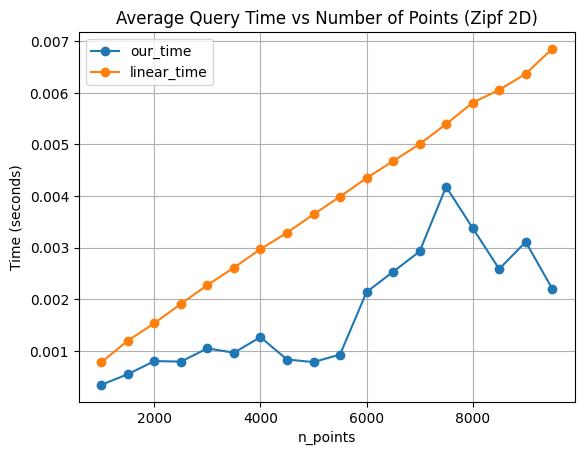

: 

: 

: 

In [ ]:
grouped = results.groupby("n_points")[["our_time", "linear_time"]].mean()
grouped.plot(marker='o')
plt.xlabel("n_points")
plt.ylabel("Time (seconds)")
plt.title("Average Query Time vs Number of Points (Zipf 2D)")
plt.grid(True)
# plt.savefig("zipf_2D_performance.png")
plt.show()

#### Random 2D

In [ ]:
results = {
    "our_time": [],
    "linear_time": [],
    "our_recall": [],
    "n_points": [],
    "dimension": [],
}

for n in range(1000, 10000, 500):
    for i in range(10):
        print("N: ", n, "run: ", i + 1)
        points = np.random.rand(n, 2)  # Generate 100 random 2D points

        print("Building index...")
        index = HierarchicalIndex(points)
        index.build_index()
        index.find_coverage()
        index.find_neighbor_stats()

        # Query range
        v = points[random.randint(0, n - 1)]
        norm = np.linalg.norm(v)
        v = v / norm
        dot = np.dot(v, v)
        query = StripeRange(v, dot - 0.2, dot + 0.2)

        print("Querying...")

        start = time.time()
        linear_results = linear_search(points, query)
        linear_time = time.time() - start
        print(
            "Linear search found",
            len(linear_results),
            "results in",
            linear_time,
            "seconds",
        )

        start = time.time()
        our_results = index.query(query)
        our_time = time.time() - start
        print("Our search found", len(our_results), "results in", our_time, "seconds")

        recall = (
            len(our_results) / len(linear_results) if len(linear_results) > 0 else 1.0
        )

        results["our_time"].append(our_time)
        results["linear_time"].append(linear_time)
        results["our_recall"].append(recall)
        results["n_points"].append(n)
        results["dimension"].append(2)

N:  1000 run:  1
Building index...
L: 10
Querying...
Linear search found 267 results in 0.0006833076477050781 seconds
candidates:  283 all:  1000
Our search found 267 results in 0.0005197525024414062 seconds
N:  1000 run:  2
Building index...
L: 10
Querying...
Linear search found 361 results in 0.0006742477416992188 seconds
candidates:  381 all:  1000
Our search found 361 results in 0.0006823539733886719 seconds
N:  1000 run:  3
Building index...
L: 10
Querying...
Linear search found 332 results in 0.0006880760192871094 seconds
candidates:  348 all:  1000
Our search found 332 results in 0.0006208419799804688 seconds
N:  1000 run:  4
Building index...
L: 10
Querying...
Linear search found 317 results in 0.0007047653198242188 seconds
candidates:  336 all:  1000
Our search found 317 results in 0.0006229877471923828 seconds
N:  1000 run:  5
Building index...
L: 10
Querying...
Linear search found 348 results in 0.0006995201110839844 seconds
candidates:  370 all:  1000
Our search found 348 r

: 

: 

: 

In [ ]:
# results = pd.DataFrame(results)
# results.to_csv("random_2D.csv", index=False)
results = pd.read_csv("random_2D.csv")

: 

: 

: 

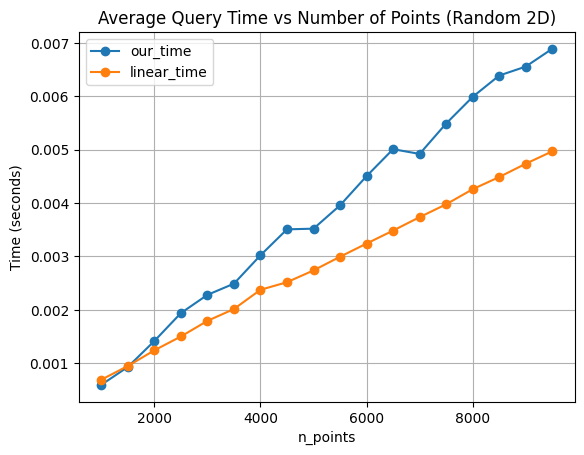

: 

: 

: 

In [ ]:
grouped = results.groupby("n_points")[["our_time", "linear_time"]].mean()
grouped.plot(marker='o')
plt.xlabel("n_points")
plt.ylabel("Time (seconds)")
plt.title("Average Query Time vs Number of Points (Random 2D)")
plt.grid(True)
# plt.savefig("random_2D_performance.png")
plt.show()

#### Multi-dim Zipf

In [ ]:
results = {
    "our_time": [],
    "linear_time": [],
    "our_recall": [],
    "n_points": [],
    "dimension": [],
}

for dim in [2, 4, 8, 16, 32]:
    n = 5000
    for i in range(5):
        print("dim: ", dim, "run: ", i + 1)
        points = np.random.zipf(1.5, size=(n, dim))

        print("Building index...")
        index = HierarchicalIndex(points)
        index.build_index()
        index.find_coverage()
        index.find_neighbor_stats()

        # Query range
        v = points[random.randint(0, n - 1)]
        norm = np.linalg.norm(v)
        v = v / norm
        dot = np.dot(v, v)
        query = StripeRange(v, dot - 0.2, dot + 0.2)

        print("Querying...")

        start = time.time()
        linear_results = linear_search(points, query)
        linear_time = time.time() - start
        print(
            "Linear search found",
            len(linear_results),
            "results in",
            linear_time,
            "seconds",
        )

        start = time.time()
        our_results = index.query(query)
        our_time = time.time() - start
        print("Our search found", len(our_results), "results in", our_time, "seconds")

        recall = (
            len(our_results) / len(linear_results) if len(linear_results) > 0 else 1.0
        )

        results["our_time"].append(our_time)
        results["linear_time"].append(linear_time)
        results["our_recall"].append(recall)
        results["n_points"].append(n)
        results["dimension"].append(dim)

dim:  2 run:  1
Building index...
L: 13


/home/mohsen/venv/lib/python3.12/site-packages/miniball.py:46: RuntimeWarning: invalid value encountered in divide
  U /= B[:, None]


Querying...
Linear search found 0 results in 0.0035486221313476562 seconds
candidates:  0 all:  5000
Our search found 0 results in 0.0001811981201171875 seconds
dim:  2 run:  2
Building index...
L: 13
Querying...
Linear search found 1869 results in 0.0037245750427246094 seconds
candidates:  2048 all:  5000
Our search found 1869 results in 0.005131721496582031 seconds
dim:  2 run:  3
Building index...
L: 13
Querying...
Linear search found 1657 results in 0.0037145614624023438 seconds
candidates:  1830 all:  5000
Our search found 1657 results in 0.004729509353637695 seconds
dim:  2 run:  4
Building index...
L: 13
Querying...
Linear search found 0 results in 0.0036869049072265625 seconds
candidates:  9 all:  5000
Our search found 0 results in 0.0002377033233642578 seconds
dim:  2 run:  5
Building index...
L: 13
Querying...
Linear search found 739 results in 0.0036513805389404297 seconds
candidates:  746 all:  5000
Our search found 739 results in 0.002090930938720703 seconds
dim:  4 run:  

: 

: 

: 

In [ ]:
results = pd.DataFrame(results)
results.to_csv("zipf_mD.csv", index=False)
# results = pd.read_csv("zipf_mD.csv")

: 

: 

: 

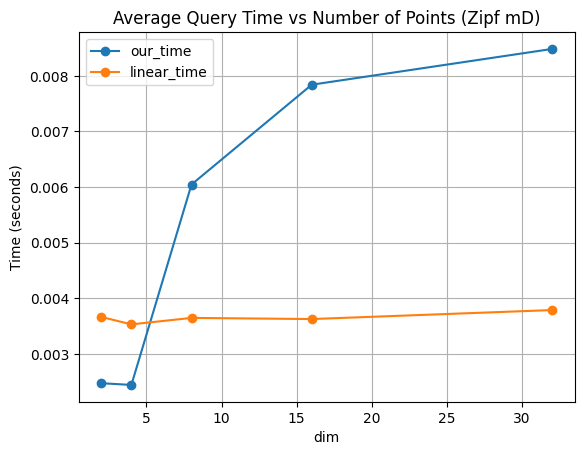

: 

: 

: 

In [ ]:
grouped = results.groupby("dimension")[["our_time", "linear_time"]].mean()
grouped.plot(marker='o')
plt.xlabel("dim")
plt.ylabel("Time (seconds)")
plt.title("Average Query Time vs Number of Points (Zipf mD)")
plt.grid(True)
plt.savefig("zipf_mD_performance.png")
plt.show()

## Experiments v1.1

#### Stripe Width

In [ ]:
n = 10000
dim = [2, 4, 8, 16, 32]

results = {
    "our_time": [],
    "linear_time": [],
    "our_recall": [],
    "dim": [],
    "n_points": [],
    "width": [],
}

for d in dim:
    print(f"dim: {d} : {dim}")
    points = np.random.zipf(1.5, size=(n, d))

    print("Building index...")
    index = HierarchicalIndex(points)
    index.build_index()
    index.find_coverage()
    index.find_neighbor_stats()

    # Query range
    for width in [
        1 / 2,
        1 / 4,
        1 / 8,
        1 / 16,
        1 / 32,
        1 / 64,
        1 / 128,
        1 / 256,
        1 / 512,
    ]:
        for i in range(5):
            print(f"\t sample {i+1} out of {5}")
            query = StripeRange.sample_stripe(points, r=width, tolerance=0.001)

            print("Querying...")
            start = time.time()
            linear_results = linear_search(points, query)
            linear_time = time.time() - start
            print(
                "Linear search found",
                len(linear_results),
                "results in",
                linear_time,
                "seconds width:",
                1 / width,
                n / len(linear_results) if len(linear_results) > 0 else 1.0,
            )

            start = time.time()
            our_results = index.query(query)
            our_time = time.time() - start
            print(
                "Our search found", len(our_results), "results in", our_time, "seconds"
            )

            recall = (
                len(our_results) / len(linear_results)
                if len(linear_results) > 0
                else 1.0
            )

            results["our_time"].append(our_time)
            results["linear_time"].append(linear_time)
            results["our_recall"].append(recall)
            results["dim"].append(d)
            results["n_points"].append(n)
            results["width"].append(len(linear_results))

dim: 2 : [2, 4, 8, 16, 32]
Building index...
L: 14


/home/mohsen/venv/lib/python3.12/site-packages/miniball.py:46: RuntimeWarning: invalid value encountered in divide
  U /= B[:, None]


	 sample 1 out of 5
Found!
Querying...
Linear search found 5009 results in 0.006966590881347656 seconds width: 2.0 1.9964064683569576
candidates:  5016 all:  10000
Our search found 5009 results in 0.011559724807739258 seconds
	 sample 2 out of 5
Found!
Querying...
Linear search found 5009 results in 0.0069501399993896484 seconds width: 2.0 1.9964064683569576
candidates:  5034 all:  10000
Our search found 5009 results in 0.009376049041748047 seconds
	 sample 3 out of 5
Found!
Querying...
Linear search found 5002 results in 0.006987333297729492 seconds width: 2.0 1.9992003198720512
candidates:  5016 all:  10000
Our search found 4996 results in 0.008953571319580078 seconds
	 sample 4 out of 5
Found!
Querying...
Linear search found 5009 results in 0.006943464279174805 seconds width: 2.0 1.9964064683569576
candidates:  5036 all:  10000
Our search found 5006 results in 0.008726358413696289 seconds
	 sample 5 out of 5
Found!
Querying...
Linear search found 4929 results in 0.007201194763183594

: 

: 

: 

In [ ]:
results = pd.DataFrame(results)
# results.to_csv("zipf_with_width.csv", index=False)

: 

: 

: 

In [8]:
def round_to_nearest_power_fraction(arr):
    """
    Round each element in arr to the nearest 1 / (2^i) for i = 1, 2, ..., such that 1/(2^i) < 1.
    Assumes all elements in arr are in (0,1).
    """
    powers = np.array([1 / (2 ** i) for i in range(1, 20)])  # Adjust range if needed
    arr = np.asarray(arr)

    def nearest_fraction(x):
        diffs = np.abs(powers - x)
        return powers[np.argmin(diffs)]

    return np.vectorize(nearest_fraction)(arr)

results["frac"] = round_to_nearest_power_fraction(results["width"] / results["n_points"])

In [ ]:
results.head()

,our_time,linear_time,our_recall,dim,n_points,width,frac
0,0.011560,0.006967,1.000000,2,10000,5009,0.5
1,0.009376,0.006950,1.000000,2,10000,5009,0.5
2,0.008954,0.006987,0.998800,2,10000,5002,0.5
3,0.008726,0.006943,0.999401,2,10000,5009,0.5
4,0.008417,0.007201,0.998174,2,10000,4929,0.5


: 

: 

: 

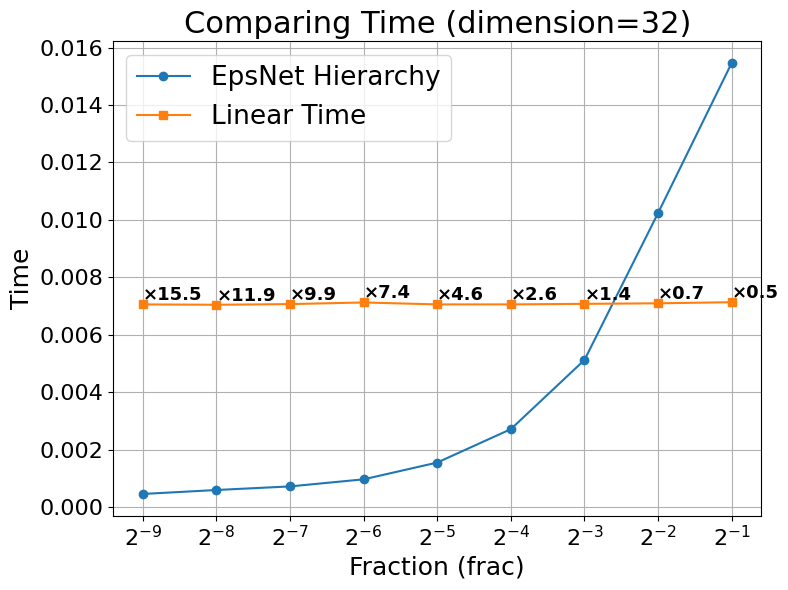

: 

: 

: 

In [ ]:
d = 32
df = results[results["dim"] == d]

# Group by frac and compute mean times
grouped = df.groupby('frac').mean(numeric_only=True)

# Compute improvement factor
grouped['improvement'] = grouped['linear_time'] / grouped['our_time']

# Plot
plt.figure(figsize=(8, 6))
plt.plot(grouped.index, grouped['our_time'], marker='o', label='EpsNet Hierarchy')
plt.plot(grouped.index, grouped['linear_time'], marker='s', label='Linear Time')

# Annotate improvement factors on linear_time line
for frac, row in grouped.iterrows():
    x = frac
    y = row['linear_time']
    imp = row['improvement']
    plt.text(x, y, f'×{imp:.1f}', fontsize=13, ha='left', va='bottom', weight='bold')

# Formatting
plt.xlabel('Fraction (frac)', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.title(f'Comparing Time (dimension={d})', fontsize=22)
plt.legend(fontsize=19)
plt.grid(True)
plt.xscale('log', base=2)
plt.xticks(fontsize=16)  # You can adjust the number as needed
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(f'zipf_with_width_dim_{d}.png')
plt.show()

In [ ]:
results["our_recall"].describe()

count    225.000000
mean       0.999221
std        0.002284
min        0.988836
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: our_recall, dtype: float64

: 

: 

: 

#### This time, each layer is 1/8 of previous one:

In [2]:
n = 10000
dim = [2, 4, 8, 16, 32]

results = {
    "our_time": [],
    "linear_time": [],
    "our_recall": [],
    "dim": [],
    "n_points": [],
    "width": [],
}

for d in dim:
    print(f"dim: {d} : {dim}")
    points = np.random.zipf(1.5, size=(n, d))

    print("Building index...")
    index = HierarchicalIndex(points, decay=8)
    index.build_index()
    index.find_coverage()
    index.find_neighbor_stats()

    # Query range
    for width in [
        1 / 2,
        1 / 4,
        1 / 8,
        1 / 16,
        1 / 32,
        1 / 64,
        1 / 128,
        1 / 256,
        1 / 512,
    ]:
        for i in range(5):
            print(f"\t sample {i+1} out of {5}")
            query = StripeRange.sample_stripe(points, r=width, tolerance=0.001)

            print("Querying...")
            start = time.time()
            linear_results = linear_search(points, query)
            linear_time = time.time() - start
            print(
                "Linear search found",
                len(linear_results),
                "results in",
                linear_time,
                "seconds width:",
                1 / width,
                n / len(linear_results) if len(linear_results) > 0 else 1.0,
            )

            start = time.time()
            our_results = index.query(query)
            our_time = time.time() - start
            print(
                "Our search found", len(our_results), "results in", our_time, "seconds"
            )

            recall = (
                len(our_results) / len(linear_results)
                if len(linear_results) > 0
                else 1.0
            )

            results["our_time"].append(our_time)
            results["linear_time"].append(linear_time)
            results["our_recall"].append(recall)
            results["dim"].append(d)
            results["n_points"].append(n)
            results["width"].append(len(linear_results))

dim: 2 : [2, 4, 8, 16, 32]
Building index...
L: 5


/home/mohsen/venv/lib/python3.12/site-packages/miniball.py:46: RuntimeWarning: invalid value encountered in divide
  U /= B[:, None]


	 sample 1 out of 5
Found!
Querying...
Linear search found 5009 results in 0.00657343864440918 seconds width: 2.0 1.9964064683569576
candidates:  5246 all:  10000
Our search found 5009 results in 0.005242824554443359 seconds
	 sample 2 out of 5
Found!
Querying...
Linear search found 5002 results in 0.006612539291381836 seconds width: 2.0 1.9992003198720512
candidates:  5298 all:  10000
Our search found 4984 results in 0.004858970642089844 seconds
	 sample 3 out of 5
Found!
Querying...
Linear search found 5005 results in 0.006609201431274414 seconds width: 2.0 1.998001998001998
candidates:  5072 all:  10000
Our search found 5005 results in 0.0045337677001953125 seconds
	 sample 4 out of 5
Found!
Querying...
Linear search found 5009 results in 0.006610393524169922 seconds width: 2.0 1.9964064683569576
candidates:  5104 all:  10000
Our search found 5009 results in 0.004542112350463867 seconds
	 sample 5 out of 5
Found!
Querying...
Linear search found 5009 results in 0.006561994552612305 s

In [ ]:
results = pd.DataFrame(results)
# results.to_csv("zipf_with_width_decay=8.csv", index=False)

In [ ]:
results["frac"] = round_to_nearest_power_fraction(results["width"] / results["n_points"])
results["our_recall"].describe()

count    225.000000
mean       0.999979
std        0.000252
min        0.996401
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: our_recall, dtype: float64

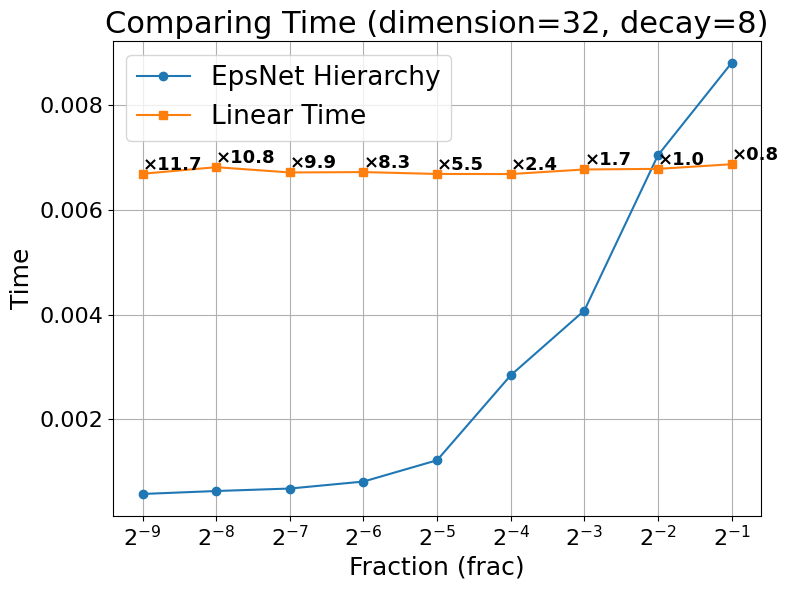

In [16]:
d = 32
df = results[results["dim"] == d]

# Group by frac and compute mean times
grouped = df.groupby('frac').mean(numeric_only=True)

# Compute improvement factor
grouped['improvement'] = grouped['linear_time'] / grouped['our_time']

# Plot
plt.figure(figsize=(8, 6))
plt.plot(grouped.index, grouped['our_time'], marker='o', label='EpsNet Hierarchy')
plt.plot(grouped.index, grouped['linear_time'], marker='s', label='Linear Time')

# Annotate improvement factors on linear_time line
for frac, row in grouped.iterrows():
    x = frac
    y = row['linear_time']
    imp = row['improvement']
    plt.text(x, y, f'×{imp:.1f}', fontsize=13, ha='left', va='bottom', weight='bold')

# Formatting
plt.xlabel('Fraction (frac)', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.title(f'Comparing Time (dimension={d}, decay=8)', fontsize=22)
plt.legend(fontsize=19)
plt.grid(True)
plt.xscale('log', base=2)
plt.xticks(fontsize=16)  # You can adjust the number as needed
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(f'zipf_with_width_dim_{d}_decay=8.png')
plt.show()

#### Decay=64

In [17]:
n = 10000
dim = [2, 4, 8, 16, 32]

results = {
    "our_time": [],
    "linear_time": [],
    "our_recall": [],
    "dim": [],
    "n_points": [],
    "width": [],
}

for d in dim:
    print(f"dim: {d} : {dim}")
    points = np.random.zipf(1.5, size=(n, d))

    print("Building index...")
    index = HierarchicalIndex(points, decay=64)
    index.build_index()
    index.find_coverage()
    index.find_neighbor_stats()

    # Query range
    for width in [
        1 / 2,
        1 / 4,
        1 / 8,
        1 / 16,
        1 / 32,
        1 / 64,
        1 / 128,
        1 / 256,
        1 / 512,
    ]:
        for i in range(5):
            print(f"\t sample {i+1} out of {5}")
            query = StripeRange.sample_stripe(points, r=width, tolerance=0.001)

            print("Querying...")
            start = time.time()
            linear_results = linear_search(points, query)
            linear_time = time.time() - start
            print(
                "Linear search found",
                len(linear_results),
                "results in",
                linear_time,
                "seconds width:",
                1 / width,
                n / len(linear_results) if len(linear_results) > 0 else 1.0,
            )

            start = time.time()
            our_results = index.query(query)
            our_time = time.time() - start
            print(
                "Our search found", len(our_results), "results in", our_time, "seconds"
            )

            recall = (
                len(our_results) / len(linear_results)
                if len(linear_results) > 0
                else 1.0
            )

            results["our_time"].append(our_time)
            results["linear_time"].append(linear_time)
            results["our_recall"].append(recall)
            results["dim"].append(d)
            results["n_points"].append(n)
            results["width"].append(len(linear_results))

dim: 2 : [2, 4, 8, 16, 32]
Building index...
L: 3


/home/mohsen/venv/lib/python3.12/site-packages/miniball.py:46: RuntimeWarning: invalid value encountered in divide
  U /= B[:, None]


	 sample 1 out of 5
Found!
Querying...
Linear search found 5009 results in 0.0066242218017578125 seconds width: 2.0 1.9964064683569576
candidates:  5925 all:  10000
Our search found 5009 results in 0.005023002624511719 seconds
	 sample 2 out of 5
Found!
Querying...
Linear search found 4999 results in 0.0066874027252197266 seconds width: 2.0 2.000400080016003
candidates:  5421 all:  10000
Our search found 4999 results in 0.004244327545166016 seconds
	 sample 3 out of 5
Found!
Querying...
Linear search found 5001 results in 0.006618976593017578 seconds width: 2.0 1.9996000799840032
candidates:  5552 all:  10000
Our search found 5001 results in 0.004351377487182617 seconds
	 sample 4 out of 5
Found!
Querying...
Linear search found 5009 results in 0.006600141525268555 seconds width: 2.0 1.9964064683569576
candidates:  5513 all:  10000
Our search found 5009 results in 0.00428318977355957 seconds
	 sample 5 out of 5
Found!
Querying...
Linear search found 5007 results in 0.006594657897949219 

In [ ]:
results = pd.DataFrame(results)
# results.to_csv("zipf_with_width_decay=64.csv", index=False)

In [19]:
results["frac"] = round_to_nearest_power_fraction(results["width"] / results["n_points"])
results["our_recall"].describe()

count    225.000000
mean       0.999972
std        0.000350
min        0.994819
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: our_recall, dtype: float64

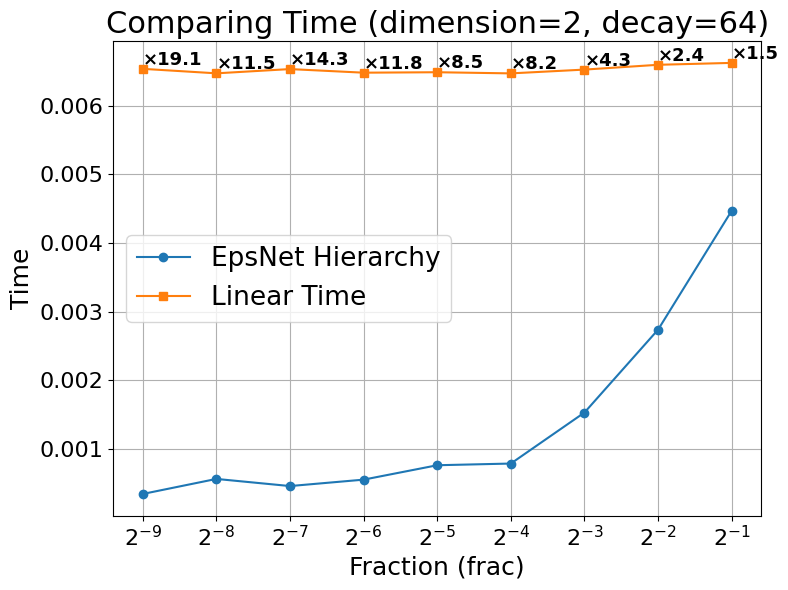

In [22]:
d = 2
df = results[results["dim"] == d]

# Group by frac and compute mean times
grouped = df.groupby('frac').mean(numeric_only=True)

# Compute improvement factor
grouped['improvement'] = grouped['linear_time'] / grouped['our_time']

# Plot
plt.figure(figsize=(8, 6))
plt.plot(grouped.index, grouped['our_time'], marker='o', label='EpsNet Hierarchy')
plt.plot(grouped.index, grouped['linear_time'], marker='s', label='Linear Time')

# Annotate improvement factors on linear_time line
for frac, row in grouped.iterrows():
    x = frac
    y = row['linear_time']
    imp = row['improvement']
    plt.text(x, y, f'×{imp:.1f}', fontsize=13, ha='left', va='bottom', weight='bold')

# Formatting
plt.xlabel('Fraction (frac)', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.title(f'Comparing Time (dimension={d}, decay=64)', fontsize=22)
plt.legend(fontsize=19)
plt.grid(True)
plt.xscale('log', base=2)
plt.xticks(fontsize=16)  # You can adjust the number as needed
plt.yticks(fontsize=16)
plt.tight_layout()
# plt.savefig(f'zipf_with_width_dim_{d}_decay=8.png')
plt.show()